In [27]:
import librosa
import matplotlib.pyplot as plt
import numpy as np

In [28]:
y, sr = librosa.load("./record-test.mp3")

## Frequency Segments
The reason to separate the audio in segments of time is because there may be noises, frequency peaks due to interferences, environment sounds, and so on. If we calculate as a whole, the statistics will carry these noises in their values.

In [29]:
# each 'segment_duration' statistics of that segment are calculated
segment_duration = 10

In [30]:
def generate_plot(f0, f0_mean, f0_std, f0_var, f0_min, f0_max):
    plt.figure(figsize=(15, 8))
    plt.scatter(librosa.times_like(f0), f0, color='red', s=5)
    plt.axhline(f0_mean, color='blue', linestyle='dashed', label=f'Mean Frequency: {f0_mean:.2f} Hz')
    plt.axhline(f0_var, color='red', linestyle='dashed', label=f'Variance: {f0_var:.2f} Hz')
    plt.fill_between(librosa.times_like(f0), f0_mean - f0_std, f0_mean + f0_std, color='blue', alpha=0.2, label=f'± Standard Deviation')
    plt.axhline(f0_min, color='green', linestyle='dashed', label=f'Min Frequency: {f0_min:.2f} Hz')
    plt.axhline(f0_max, color='purple', linestyle='dashed', label=f'Max Frequency: {f0_max:.2f} Hz')
    plt.xlabel('Time (s)')
    plt.ylabel('Fundamental Frequency (Hz)')
    plt.title('Fundamental Frecuency over time')
    plt.legend()
    plt.show()

def calculate_statistics(f0):
    f0_mean = np.mean(f0[np.isfinite(f0)])
    f0_std = np.std(f0[np.isfinite(f0)])
    f0_var = np.var(f0[np.isfinite(f0)])
    f0_min = np.min(f0[np.isfinite(f0)])
    f0_max = np.max(f0[np.isfinite(f0)])
    return f0_mean, f0_std, f0_var, f0_min, f0_max

## Fundamental Frequency
Some statistics are calculated on those valid frequency values in the following block of code. This is because some frequency tends to infinity, and thus errors are introduced when the plots are drawn.

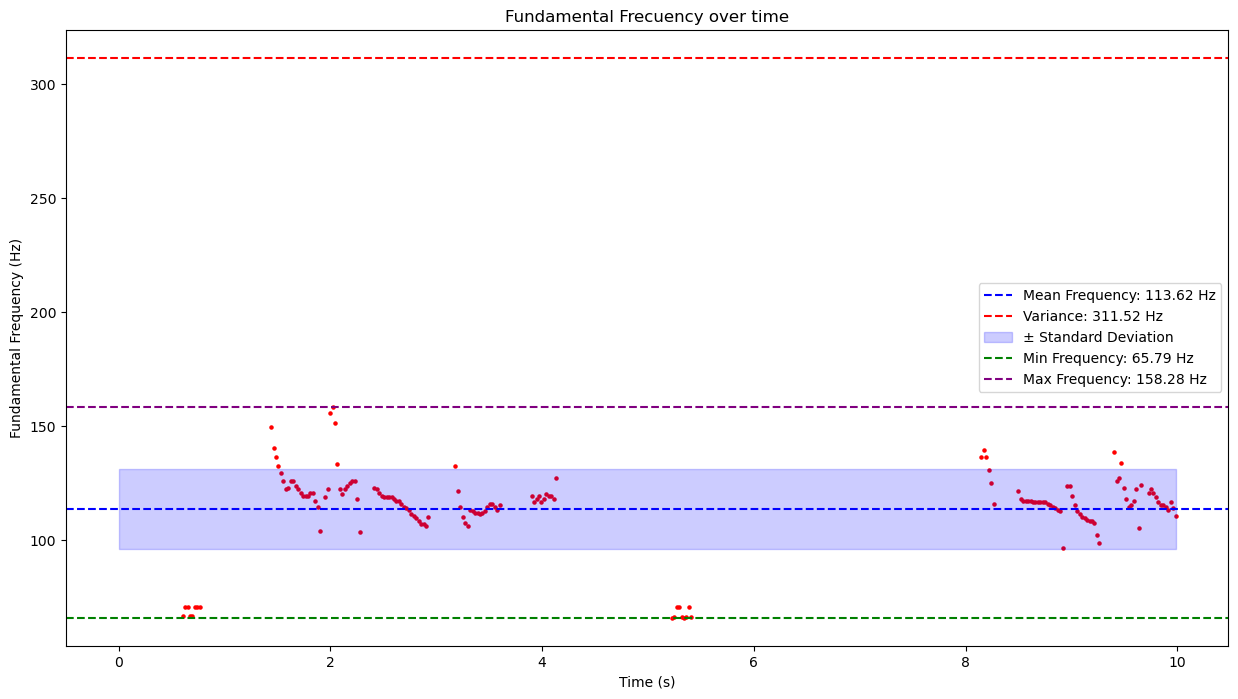

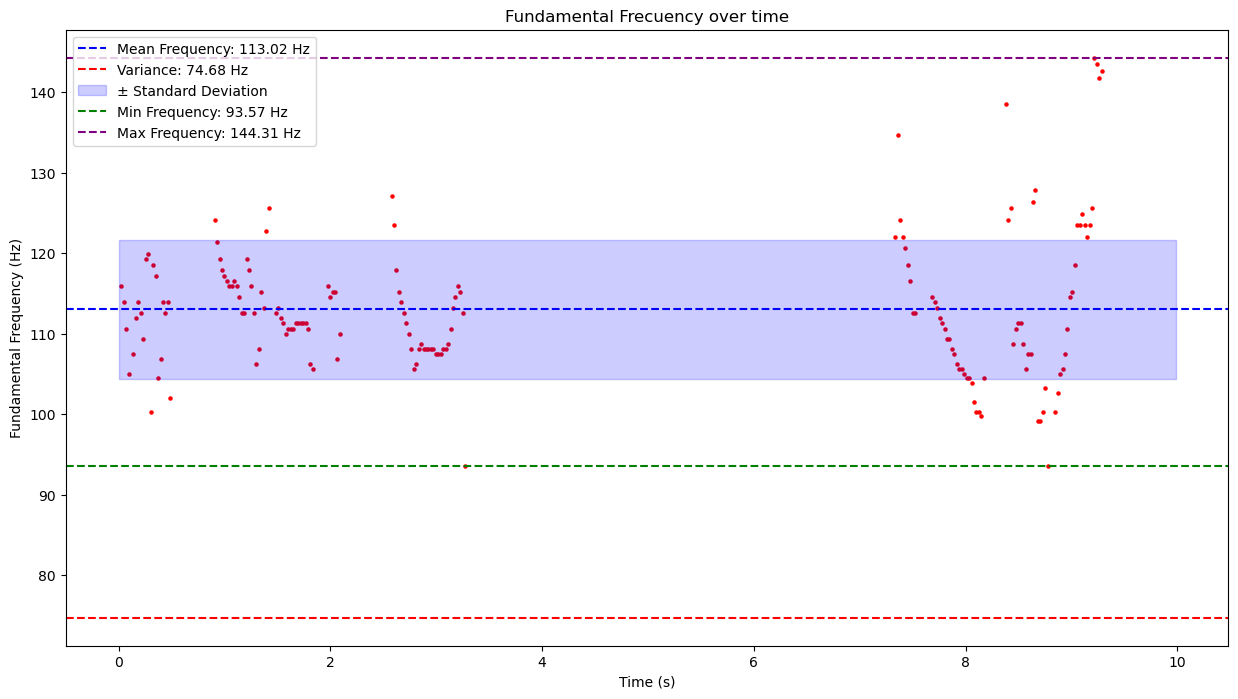

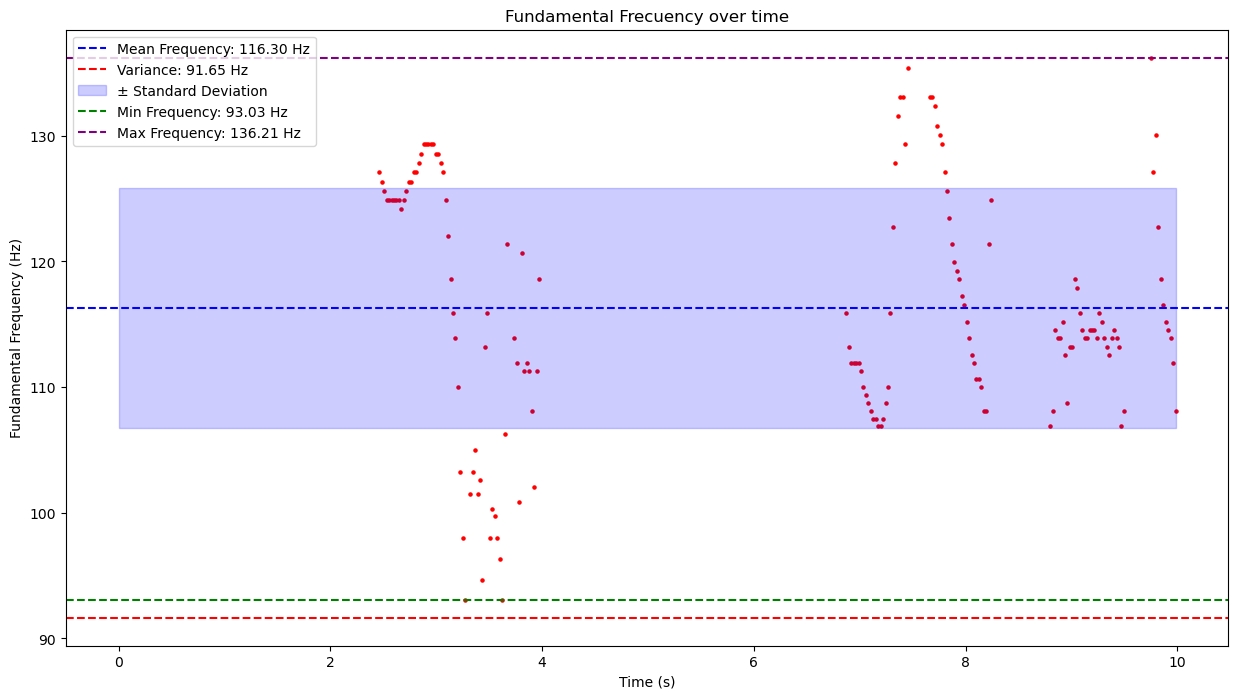

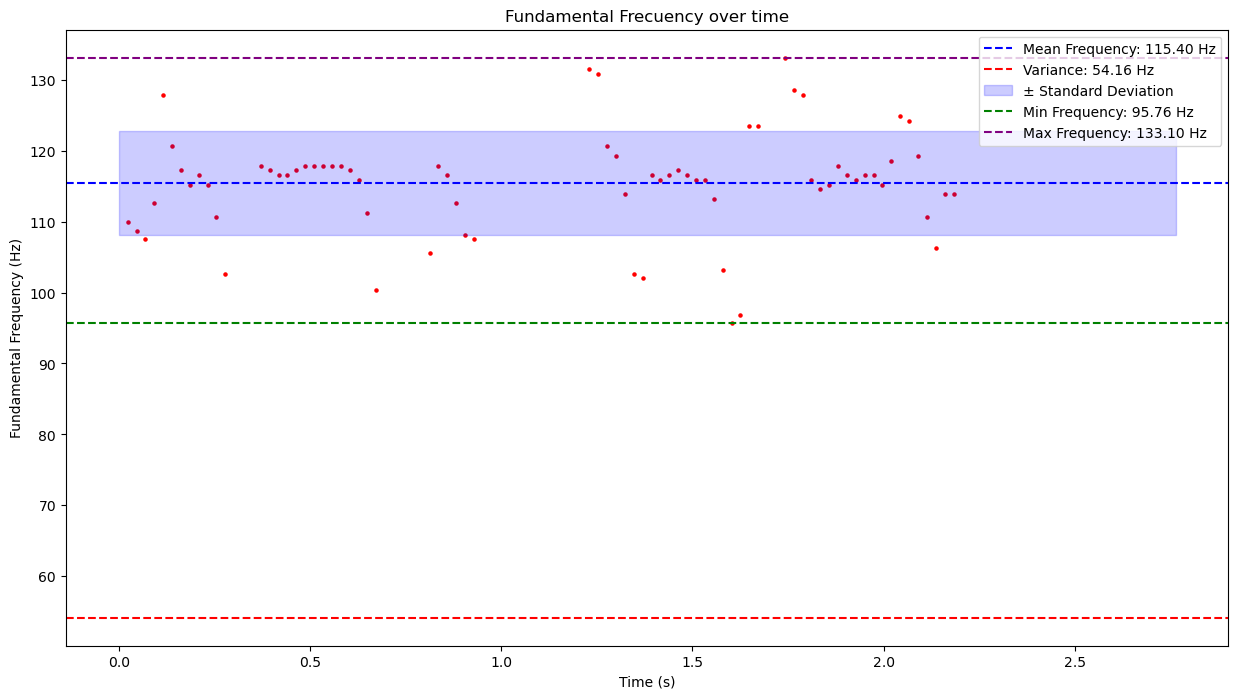

In [31]:
results = []
# freq min = ~65 Hz
freq_min = librosa.note_to_hz('C2')
# freq max = ~2093 Hz
freq_max = librosa.note_to_hz('C7')
for i in range(0, len(y), sr * segment_duration):
    sample = y[i:i+sr*segment_duration]
    f0, _, _ = librosa.pyin(sample, fmin = freq_min, fmax = freq_max)
    if np.any(np.isfinite(f0)): # make sure to only include finite values
        f0_mean, f0_std, f0_var, f0_min, f0_max = calculate_statistics(f0)
        generate_plot(f0, f0_mean, f0_std, f0_var, f0_min, f0_max)